# Quora Data Exploration Notebook

## Overview of quora questions

2015:
    70% male 30% female;
    Most graduated from college;
    18-24 years old then 25-34;
    India and US each 43%
    
Alexa past 30 days:
    US 34.4%;
    India 22%

Some characteristics that can signify that a question is insincere:

1. Has a non-neutral tone
2. Is disparaging or inflammatory
3. Isn't grounded in reality
4. Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers

## Test and Train

In [13]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print 'Train shape : ', train.shape
print 'Test shape : ', test.shape

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [98]:
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [54]:
train['review_len'] = train['question_text'].astype(str).apply(len)
train['word_count'] = train['question_text'].apply(lambda x: len(str(x).split()))

In [55]:
print 'Train first five questions:'
train.head()

Train first five questions:


,qid,question_text,target,review_len,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15


## Text Length and Word Count

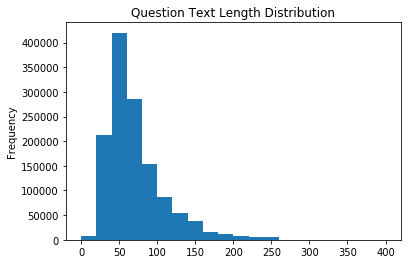

In [62]:
train['review_len'].plot.hist(title='Question Text Length Distribution', range=(0, 400), bins=20)

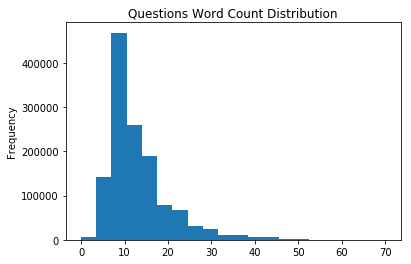

In [66]:
train['word_count'].plot.hist(title='Questions Word Count Distribution', range=(0, 70), bins=20)

## Sentiment Analysis

In [79]:
%%time
from textblob import TextBlob

train['setiment'] = train['question_text'].map(lambda text: TextBlob(text.decode('utf-8')).sentiment.polarity)

CPU times: user 17min 27s, sys: 13.7 s, total: 17min 40s
Wall time: 17min 32s


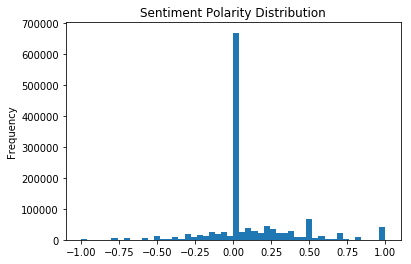

In [103]:
train['setiment'].plot.hist(bins=50, title='Sentiment Polarity Distribution')

##  Overview By target

In [50]:
print 'Number of questions with the target == 1 : ', train[train['target']==1].shape[0]
print ('The percentage : %0.1f' % (100.*train[train['target']==1].shape[0]/train.shape[0]))
print '\nRandom 5 samples:'
for t in train.loc[train.target==1, ['question_text']].sample(5).values:
    print t

Number of questions with the target == 1 :  80810
The percentage : 6.2

Random 5 samples:
['Do Americans lack manners and respect in general?']
['Are Alabamians really descendants of gods?']
["Why does Ireland now pretend to have helped the Allies when it's actions mainly helped Hitler?"]
['What are the more steps in Career Oriented Education?']
["Why won't the government release data on UFOs to the public? There is too much evidence to deny. Would it cause mass hysteria?"]


In [51]:
print 'Number of questions with the target == 0 : ', train[train['target']==0].shape[0]
print ('The percentage : %0.1f' % (100.*train[train['target']==0].shape[0]/train.shape[0]))
print '\nRandom 5 samples:'
for t in train.loc[train.target==0, ['question_text']].sample(5).values:
    print t

Number of questions with the target == 0 :  1225312
The percentage : 93.8

Random 5 samples:
['Why do most religious people think you need to believe in a God to be kind and have morals?']
['Were does aloe Vera store its water?']
['Which metal is used in scythe blades?']
['Who was the better man, Achilles or Odysseus?']
['What is the coefficient of [math]x^2[/math] in the expansion of [math]\\displaystyle\\prod_{k=1}^{15} \\left[ 1+(-1)^k \\times k \\right] [/math] ?']


## Unigrams

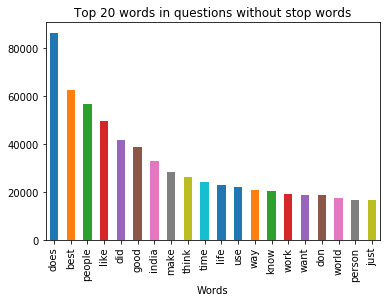

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['Words' , 'count'])
df.groupby('Words').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 words in questions without stop words')

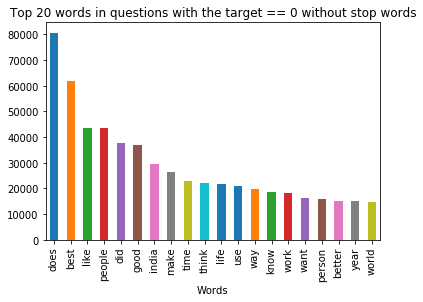

In [77]:
common_words = get_top_n_words(train[train['target']==0]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['Words' , 'count'])
df.groupby('Words').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 words in questions with the target == 0 without stop words')

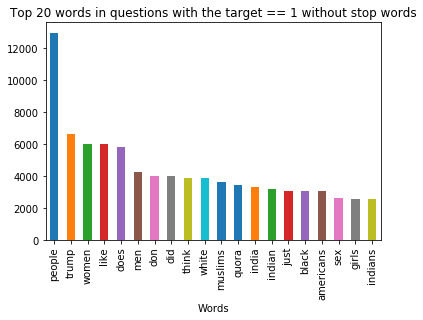

In [78]:
common_words = get_top_n_words(train[train['target']==1]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['Words' , 'count'])
df.groupby('Words').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 words in questions with the target == 1 without stop words')

## Bigrams

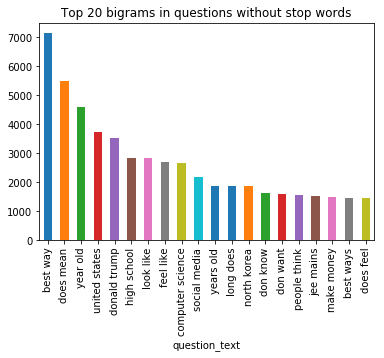

In [107]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(train['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 bigrams in questions without stop words')

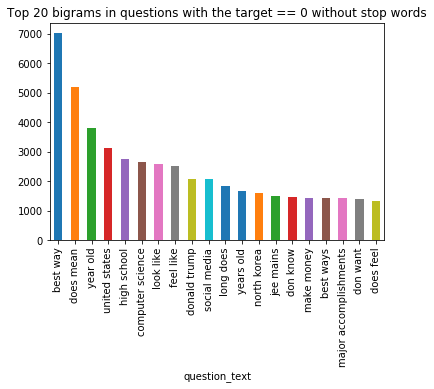

In [108]:
common_words = get_top_n_bigram(train[train['target']==0]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 bigrams in questions with the target == 0 without stop words')

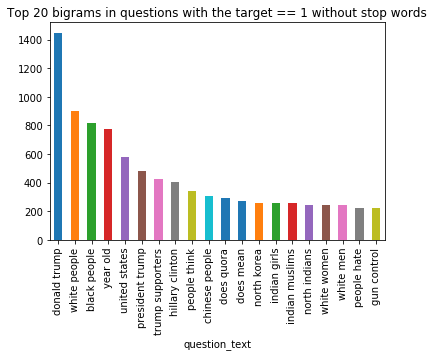

In [109]:
common_words = get_top_n_bigram(train[train['target']==1]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 bigrams in questions with the target == 1 without stop words')

## Trigrams

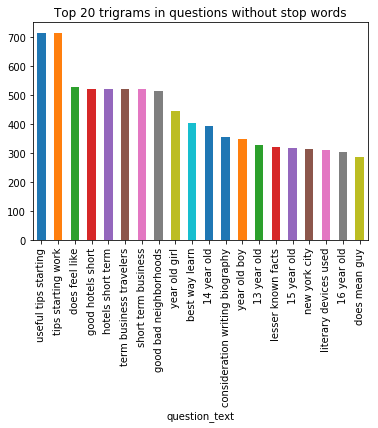

In [110]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(train['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 trigrams in questions without stop words')

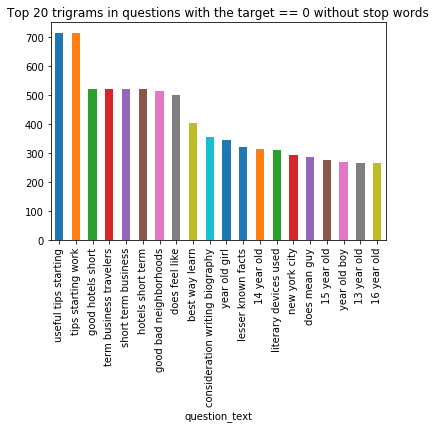

In [111]:
common_words = get_top_n_trigram(train[train['target']==0]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 trigrams in questions with the target == 0 without stop words')

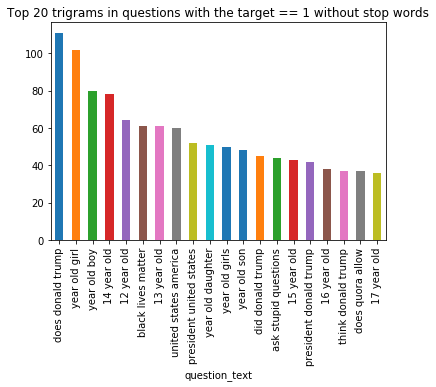

In [113]:
common_words = get_top_n_trigram(train[train['target']==1]['question_text'], 20)
df = pd.DataFrame(common_words, columns = ['question_text' , 'count'])
df.groupby('question_text').sum()['count'].sort_values(ascending=False).plot.bar(
                    title='Top 20 trigrams in questions with the target == 1 without stop words')

# Preprocessing

## Lowering 

In [ ]:
train['lowered_question'] = train['question_text'].apply(lambda x: x.lower())

## Replacing Contractions

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": 
                       "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": 
                       "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                       "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": 
                       "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": 
                       "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": 
                       "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": 
                       "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                       "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": 
                       "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": 
                       "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": 
                       "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": 
                       "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": 
                       "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                       "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": 
                       "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": 
                       "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", 
                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": 
                       "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": 
                       "you will have", "you're": "you are", "you've": "you have" }

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [ ]:
train['treated_question'] = train['lowered_question'].apply(lambda x: clean_contractions(x, contraction_mapping))

## Replacing Special Characters

In [ ]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", 
                 "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 
                 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', 
                 '∅': '', '³': '3', 'π': 'pi', }

def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    for p in punct:
        text = text.replace(p, " %s " % p)
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [ ]:
train['treated_question'] = train['treated_question'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

## Replacing Mispells

In [ ]:
mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 
                'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 
                'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 
                'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 
                'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation',
                'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum',
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 
                'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 
                'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 
                'demonetization'}

def correct_spelling(x, dic):
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

In [ ]:
train['treated_question'] = train['treated_question'].apply(lambda x: correct_spelling(x, mispell_dict))

## No slangs

## Checking

In [44]:
for q in train['treated_question'].sample(20):
    print q, '\n'

how do i check if my iphone is unlocked ?  other than inserting a new sim card ?  

if aliens came to earth ,  what food would you offer them first ?  

what are the reviews for savaari . com for outstation taxi from delhi ?  

what made you realise your child is more intelligent than they let on ?  

will kylo ren sacrifice himself for rey ?  

what effect would lars and beru castrating luke skywalker as a child have on the star wars trilogy ?  

how do i get healthy food when i am a broke college student in debt ?  

what would you expect to be the next major breakthrough in computer technology ?  

what are some hoaxes people still belive are true ?  

two pens and a pencil cost e1 . 48 .  two pens and three pencils cost e2 . 12 .  what is the cost of one pencil ?  what is the cost of one pen ?  

what is the world trade center really for ?  

how do i develop a rakeback calculator for android devices ?  

how much corruption is prevalent among ias officers ?  does everyone who is i

## Loading embeddings¶

In [ ]:
import io
import numpy as np
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == 'wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in io.open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in io.open(file, encoding='latin'))
        
    return embeddings_index

In [15]:
glove = 'glove.840B.300d.txt'
paragram =  'paragram_300_sl999.txt'
wiki_news = 'wiki-news-300d-1M.vec'

In [ ]:
print("Extracting GloVe embedding")
embed_glove = load_embed(glove)
print("Extracting Paragram embedding")
embed_paragram = load_embed(paragram)
print("Extracting FastText embedding")
embed_fasttext = load_embed(wiki_news)

Extracting GloVe embedding


In [ ]:
from gensim.models import KeyedVectors

word2vec = 'GoogleNews-vectors-negative300.bin'
embed_word2vec = KeyedVectors.load_word2vec_format(news_path, binary=True)

## Checking coverage before and after preprocessing

In [ ]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [ ]:
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [ ]:
vocab = build_vocab(df['question_text'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)
print("Word2vec : ")
oov_fasttext = check_coverage(vocab, embed_word2vec)

In [ ]:
vocab = build_vocab(df['treated_question'])
print("Glove : ")
oov_glove = check_coverage(vocab, embed_glove)
print("Paragram : ")
oov_paragram = check_coverage(vocab, embed_paragram)
print("FastText : ")
oov_fasttext = check_coverage(vocab, embed_fasttext)
print("Word2vec : ")
oov_fasttext = check_coverage(vocab, embed_word2vec)